# Import Required Libraries
Import the necessary libraries, including numpy, matplotlib, and scipy.

In [1]:
import pandas as pd
import numpy as np
from astropy.visualization import hist
import matplotlib.pyplot as plt
import seaborn as sns
import re

from scipy.stats import norm

%matplotlib inline
plt.rcParams["figure.figsize"] = [10, 5]

def parse_if_number(s):
    try: return float(s)
    except: return True if s=="true" else False if s=="false" else s if s else None

def parse_ndarray(s):
    return np.fromstring(s, sep=' ') if s else None

filename = "position.csv"

data = pd.read_csv(filename, converters = {
        'attrvalue': parse_if_number,
        'binedges': parse_ndarray,
        'binvalues': parse_ndarray,
        'vectime': parse_ndarray,
        'vecvalue': parse_ndarray})


vectors = data[data.type=='vector']

vectors related 'camObjectIDs',
        'camObjectXPositions', 'camObjectYPositions', 'camObjectSpeeds',
        'camObjectHeadingValues', 'camObjectTimestamps', 'receivedCpms',

In [2]:
camObjectIDs = vectors[vectors['name'] == 'camObjectIDs']
camObjectXPositions = vectors[vectors['name'] == 'camObjectXPositions']
camObjectYPositions = vectors[vectors['name'] == 'camObjectYPositions']
camObjectSpeeds = vectors[vectors['name'] == 'camObjectSpeeds']
camObjectHeadingValues = vectors[vectors['name'] == 'camObjectHeadingValues']
camObjectTimestamps = vectors[vectors['name'] == 'camObjectTimestamps']

camObjectIDsvalues = []
camObjectXPositionsvalues = []
camObjectYPositionsvalues = []
camObjectSpeedsvalues = []
camObjectHeadingValuesvalues = []
camObjectTimestampsvalues = []

for row in camObjectIDs.itertuples():
        camObjectIDsvalues.append(row.vecvalue)
for row in camObjectXPositions.itertuples():
        camObjectXPositionsvalues.append(row.vecvalue)
for row in camObjectYPositions.itertuples():
        camObjectYPositionsvalues.append(row.vecvalue)
for row in camObjectTimestamps.itertuples():
        camObjectTimestampsvalues.append(row.vecvalue)

print(camObjectTimestampsvalues[0])               

[ 1.29110867  1.49110867  1.79110867 ... 29.98792018 29.9911092
 29.99409106]


In [3]:
combined_list = [list(item) for item in zip(camObjectTimestampsvalues, camObjectIDsvalues, camObjectXPositionsvalues, camObjectYPositionsvalues )]
#print(combined_list[0])

print(len(combined_list))

30


In [4]:
df = pd.DataFrame(combined_list, columns=['Timestamp', 'ID', 'X', 'Y'])
#print(df.iloc[0])


result = []

for sublist in combined_list:
    timestamp_list = []
    id_list = []
    x_list = []
    y_list = []

    for item in sublist:
        timestamp_list.append(item[0])
        id_list.append(item[1])
        x_list.append(item[2])
        y_list.append(item[3])

    new_list = [timestamp_list, id_list, x_list, y_list]
    result.append(new_list)

print(result)


[[[1.291108674537, 20.0, 181150.0, 10330.0], [1.49110867297, 20.0, 181150.0, 10820.0], [1.791108669915, 20.0, 181150.0, 11690.0], [2.091108665967, 20.0, 181150.0, 12730.0]], [[1.470039675313, 111.0, 98810.0, 88940.0], [1.670039673378, 111.0, 99000.0, 88940.0], [1.87003967104, 111.0, 99280.0, 88940.0], [2.07003966831, 111.0, 99620.0, 88940.0]], [[2.370039307399, 111.0, 100280.0, 88940.0], [2.391108677981, 20.0, 181150.0, 13950.0], [2.670039310483, 111.0, 101100.0, 88940.0], [2.691108674459, 20.0, 181150.0, 15330.0]], [[4.105331065023, 202.0, 88350.0, 77230.0], [4.170039661392, 111.0, 107580.0, 88940.0], [4.191108961467, 20.0, 181150.0, 24640.0], [4.405331065101, 202.0, 88350.0, 75960.0]], [[4.705331002257, 202.0, 88350.0, 74540.0], [4.758228841935, 293.0, -1480.0, 78810.0], [4.77003959739, 111.0, 111300.0, 88940.0], [4.791108640519, 20.0, 181150.0, 29550.0]], [[6.058228784637, 293.0, -1480.0, 73430.0], [6.191109077251, 20.0, 181150.0, 43700.0], [6.205331243656, 202.0, 88350.0, 65110.0],

In [7]:
#print(result[0])

df = pd.DataFrame(result[0], columns=['Timestamp', 'ID', 'X', 'Y'])

#print(df.iloc[0:10])

filtered_df = df[df['Timestamp'].between(1, 3)]

print(filtered_df)

   Timestamp    ID         X        Y
0   1.291109  20.0  181150.0  10330.0
1   1.491109  20.0  181150.0  10820.0
2   1.791109  20.0  181150.0  11690.0
3   2.091109  20.0  181150.0  12730.0


# Define Gaussian Error Model
Define the Gaussian error model, including the mean and standard deviation parameters.

In [8]:

original_x_positions = [i for i in filtered_df.X]    
original_y_positions = [i for i in filtered_df.Y]

std_dev_x = np.std(original_x_positions)
std_dev_y = np.std(original_y_positions)

print("Standard Deviation of X positions: ", std_dev_x)
print("Standard Deviation of Y positions: ", std_dev_y)

mean_x = np.mean(original_x_positions)
mean_y = np.mean(original_y_positions)

print("Mean of X positions: ", mean_x)
print("Mean of Y positions: ", mean_y)


Standard Deviation of X positions:  0.0
Standard Deviation of Y positions:  912.972480417674
Mean of X positions:  181150.0
Mean of Y positions:  11392.5


In [10]:
import numpy as np

time_stamps = [i for i in filtered_df.Timestamp]
# Assume original_x_positions and original_y_positions are your original measurements
original_x_positions = [i for i in filtered_df.X]    
original_y_positions = [i for i in filtered_df.Y]

# Determine the standard deviation
std_dev_x = np.std(original_x_positions)
std_dev_y = np.std(original_y_positions)

# Generate random numbers from a Gaussian distribution with mean 0 and the determined standard deviation
x_errors = np.random.normal(0, std_dev_x, len(original_x_positions))
y_errors = np.random.normal(0, std_dev_y, len(original_y_positions))

# Add the errors to the original measurements
x_positions_with_noise = [original + error for original, error in zip(original_x_positions, x_errors)]
y_positions_with_noise = [original + error for original, error in zip(original_y_positions, y_errors)]

print(original_x_positions)
print(x_positions_with_noise)
print(original_y_positions)
print(y_positions_with_noise)

[181150.0, 181150.0, 181150.0, 181150.0]
[181150.0, 181150.0, 181150.0, 181150.0]
[10330.0, 10820.0, 11690.0, 12730.0]
[9421.521934788685, 10218.54332906808, 11196.052019534976, 12826.318172393641]


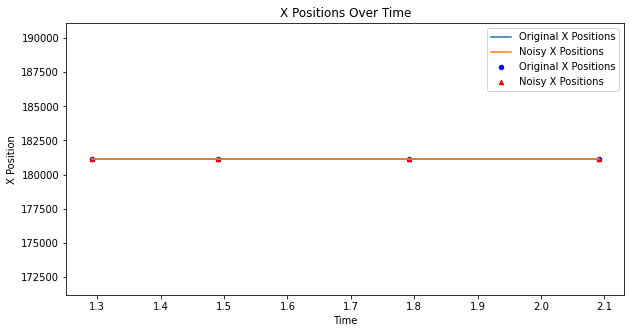

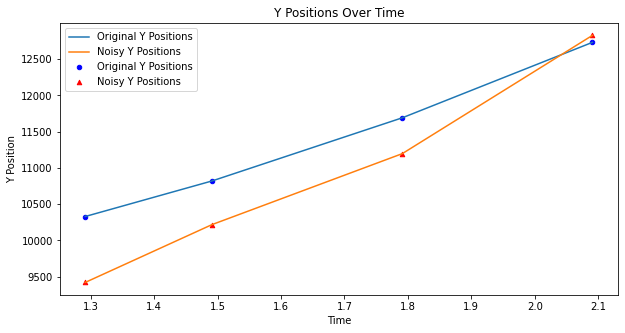

In [11]:
import matplotlib.pyplot as plt
import matplotlib.ticker

# Create separate arrays for original and noisy x positions
original_x_positions_array = original_x_positions.copy()
noisy_x_positions_array = x_positions_with_noise.copy()

# Plot original x positions
plt.figure(figsize=(10, 5))
plt.plot(time_stamps, original_x_positions_array, label='Original X Positions')
plt.plot(time_stamps, noisy_x_positions_array, label='Noisy X Positions')
# Plot dots for original x positions
plt.scatter(time_stamps, original_x_positions_array, label='Original X Positions', marker='o', c='blue', s=20)

# Plot dots for noisy x positions
plt.scatter(time_stamps, noisy_x_positions_array, label='Noisy X Positions', marker='^', c='red', s=20)
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%.0f'))
plt.title('X Positions Over Time')
plt.xlabel('Time')
plt.ylabel('X Position')
plt.legend()
plt.show()

# Create separate arrays for original and noisy y positions
original_y_positions_array = original_y_positions.copy()
noisy_y_positions_array = y_positions_with_noise.copy()

# Plot original y positions
plt.figure(figsize=(10, 5))
plt.plot(time_stamps, original_y_positions_array, label='Ground Truth Y Positions')
plt.plot(time_stamps, noisy_y_positions_array, label='Noisy Y Positions')

# Plot dots for original x positions
plt.scatter(time_stamps, original_y_positions_array, label='Original Y Positions', marker='o', c='blue', s=20)

# Plot dots for noisy x positions
plt.scatter(time_stamps, noisy_y_positions_array, label='Noisy Y Positions', marker='^', c='red', s=20)
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%.0f'))
plt.title('Y Positions Over Time')
plt.xlabel('Time')
plt.ylabel('Y Position')
plt.legend()
plt.show()

